$$\require{mhchem}$$       

# Exam 1 Problem 1 (60 pts)

 We have a liquid feed of A and B, with concentration of A 2M and concentration of B 3M, with a total flow rate of 0.1 m$^3$/s.  We are looking to optimize the conversion of the reaction: 
\begin{align*}
\ce{A + 2B -> C}
\end{align*}
You can assume in all cases the reaction is isothermal and the volume does not change with changes in the molar flow rates of the reactants.  The reaction is elementary and the rate constant is $k_1=0.1 dm^6/mol^2/s$



## First, find the maximum extent of reaction $\xi^{max}$ and write the rate equation $r$. (5 pts)

\begin{align*}
    \xi^{max} = min (\frac{CA0}{\alpha_A}, \frac{CB0}{\alpha_B}) = min (2, 1.5) = 1.5 \\
    r = k_1 C_A C_B^2
\end{align*}

## Now, find the extent of reaction for a steady state 100 L CSTR with the feed and flow rate from above. (10 pts)
<img src="E1P1B.png" alt="Drawing" style="width: 300px;"/>


In [4]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
nu = 0.1e3 # L/s
CA0 = 2 # M
CB0 = 3 # M
k1 = 0.1 # L2/mol2/s

V = 100 # L

def CSTR(xi):
    CA = CA0 - xi
    CB = CB0 - 2 * xi
    
    r = k1 * CA * CB ** 2
    
    res = CA0 * nu / V - CA * nu / V - r
    return res

xi_CSTR, = fsolve(CSTR, 2)
print('The extent of reaction at the steady state is {:1.2f} M.'.format(xi_CSTR))

The extent of reaction at the steady state is 0.54 M.


In [152]:
def CSTR(C):
    CA, CB = C
    
    r = k1 * CA * CB ** 2
    
    res1 = CA0 * nu / V - CA * nu / V - r
    res2 = CB0 * nu / V - CB * nu / V - 2 * r
    
    return [res1, res2]

In [154]:
C_CSTR = fsolve(CSTR, [1, 1])
C_CSTR

array([ 1.46071685,  1.9214337 ])

In [151]:
# check

CA = CA0 - xi_CSTR
CB = CB0 - 2 * xi_CSTR

r = k1 * CA * CB ** 2

CA0 * nu / V - CA * nu / V - r
CB0 * nu / V - CB * nu / V - 2 * r


8.8817841970012523e-16

## Find the final extent of reaction for a 100 L PFR (10 pts)
<img src="E1P1C.png" alt="Drawing" style="width: 300px;"/>


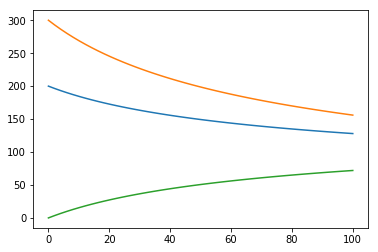

The Final extent of reaction for PFR is 0.72 M


In [94]:
F0 = [CA0 * nu, CB0 * nu, 0]
Vspan = np.linspace(0, 100) # L

def dFdV(F, V):
    FA, FB, FC = F
    CA, CB, CC = F / nu
    
    r = k1 * CA * CB ** 2
    
    return [-r, -2 * r, r]

F = odeint(dFdV, F0, Vspan)

plt.plot(Vspan, F)
plt.show()

FA_exit = F[-1, 0]
xi_exit = (F0[0] - FA_exit) / nu

print('The Final extent of reaction for PFR is {:1.2f} M'.format(xi_exit))

## Our operators tell us that they really like working with CSTR's and suggest that you use several CSTR's in series.  The total volume of CSTR's should equal 100 L.  For example, if you have 4 CSTR's, then  each will have a volume of 25 L.  The outflow of each CSTR is the same as the inflow to the next CSTR.  The extent of reaction for each reactor can be solved based on the extent of reaction from the previous reactor (sequentially).  Calculate the extent of reaction for the four reactor situation. (20 pts)
<img src="E1P1D.png" alt="Drawing" style="width: 500px;"/>


In [304]:
def CSTR_4(CA, V, CA0):
    xi = CA0 - CA
    CB = CB0 - 2 * xi
    
    r = k1 * CA * CB ** 2
    
    res = CA0 * nu / V - CA * nu / V - r
    return res

CA_4_sol, = fsolve(CSTR_4, 2, args=(25, 2))

CA_4 = []
CA_4 += [CA_4_sol]

for i in range(3):
    CA_4_sol, = fsolve(CSTR_4, 2, args=(25, CA_4[i]))
    CA_4 += [CA_4_sol]

xi_4_exit = CA0 - CA_4[-1]

print('The Final extent of 4 CSTRs is {:1.2f} M'.format(xi_4_exit))

The Final extent of 4 CSTRs is 0.90 M


In [305]:
CA_4

[1.7352361942421506,
 1.4969392456054023,
 1.2841613293320504,
 1.0956906000386664]

In [288]:
def CSTR_4(CA, V, CA0):
    xi = CA0 - CA
    CB = CB0 - 2 * xi
    
    r = k1 * CA * CB ** 2
    
    res = CA0 * nu / V - CA * nu / V - r
    return res

[CA, inf, x3 ,x4] = fsolve(CSTR_4, 2, args=(25, 2), full_output = 1)

In [332]:
def CSTR_4(C, V, C0):
    CA, CB = C
    CA0, CB0 = C0
    xi = CA0 - CA
    # CB = CB0 - 2 * xi
    
    r = k1 * CA * CB ** 2
    
    res = CA0 * nu / V - CA * nu / V - r
    res2 = CB0 * nu / V - CB * nu / V - 2 * r
    # print(res2)
    return [res, res2]

C = fsolve(CSTR_4, [1.7, 2.5], args=(25, [2, 3]))
C

array([ 1.73523619,  2.47047239])

In [307]:
V = 25

In [308]:
CA
#CA = 1.606560755626675
CA

array([ 1.49693925])

In [293]:
xi = CA0 - CA
xi

array([ 0.26476381])

In [294]:
CB = CB0 - 2 * xi
CB

array([ 2.47047239])

In [295]:
r = k1 * CA * CB ** 2

In [296]:
r

array([ 1.05905522])

In [297]:
res = CA0 * nu / V - CA * nu / V - r
res

array([ -2.24265051e-14])

In [298]:
res2 = CB0 * nu / V - CB * nu / V - 2 * r
res2

array([ -4.30766534e-14])

In [299]:
V

25

In [300]:
fsolve(CSTR_4, 2, args=(100, 2))

array([ 1.46071685])

In [301]:
def CSTR_4(CA, V, CA0):
    xi = CA0 - CA
    CB = CB0 - 2 * xi
    
    r = k1 * CA * CB ** 2
    
    res1 = CA0 * 100 / 50 - CA * 100 / 50 - r
    # res2 = CB0 * nu / V - CB * nu / V - 2 * r
    return res1 # [res1, res2]

CA_4_sol, = fsolve(CSTR_4, 0, args=(50, 2))
CA_4_sol

1.606560755626675

In [302]:
CA_4 = []
CA_4 += [CA_4_sol]

for i in range(3):
    CA_4_sol, = fsolve(CSTR_4, 2, args=(25, CA_4[i]))
    CA_4 += [CA_4_sol]

CA_4

[1.606560755626675,
 1.2660992188970639,
 0.97846422116775977,
 0.74172862868742528]

In [303]:
def CSTR_4(C, V, C0):
    CA0, CB0, CC0 = C0
    CA, CB, CC = C
    
    r = k1 * CA * CB ** 2
    
    res1 = CA0 * nu / V - CA * nu / V - r
    res2 = CB0 * nu / V - CB * nu / V - 2 * r
    res3 = CC0 * nu / V - CC * nu / V + r
    return [res1, res2, res3]

CA_4_sol = fsolve(CSTR_4, [2, 2, 2], args=(25, [2, 3, 0]))
CA_4_sol

array([ 1.73523619,  2.47047239,  0.26476381])

In [286]:

CA_4 = []
CA_4 += [CA_4_sol]

for i in range(3):
    CA_4_sol = fsolve(CSTR_4, [2, 2, 2], args=(25, CA_4[i]))
    CA_4 += [CA_4_sol]

CA_4
#CA_4[-1, 0], = CA_4[-1, 0]
#xi_4_exit = CA0 - CA_4[-1, 0]

# print('The Final extent of 4 CSTRs is {:1.2f} M'.format(xi_4_exit))

[array([ 1.73523619,  2.47047239,  0.26476381]),
 array([ 1.55996854,  2.11993707,  0.44003146]),
 array([ 1.4346439 ,  1.86928779,  0.5653561 ]),
 array([ 1.34007216,  1.68014432,  0.65992784])]

## Plot the final extent of reaction for this approach from 1 to 10 reactors, and compare to the conversions from the CSTR and PFR examples above. (9 pts)

In [89]:
xi_100_exit = []

for j in range (10):
    CA_4_sol, = fsolve(CSTR_4, 2, args=(100 / (j + 1), 2))
    # print('CA at the steady state is {:1.2f} M.'.format(CA_4_sol))

    CA_4 = []
    CA_4 += [CA_4_sol]

    for i in range(j):
        CA_4_sol, = fsolve(CSTR_4, 2, args=(100 / (j + 1), CA_4[i]))
        CA_4 += [CA_4_sol]

    xi_4_exit = CA0 - CA_4[-1]
    xi_100_exit += [xi_4_exit]

#xi_100_exit
xi_4_exit

1.0545585978404373

In [78]:
n = np.arange(0, 10, 1)
print(n)

[0 1 2 3 4 5 6 7 8 9]


## We are considering adding a membrane to the PFR.  We have a few options.  For each, answer qualitatively if you think the conversion of A would increase, decrease, or stay the same, and why: (2 pts each)
- A membrane that allows A to be added slowly through the side of the PFR (w/ pure B inlet), total molar flow rate of A & B the same
- A membrane that allows B to be added slowly through the side of the PFR (w/ pure A inlet), total molar flow rate of A & B the same
- A membrane that allows C to be removed continuously through the side of the PDF

# Exam 1 Problem 2 (40 pts)

We are looking to design a liquid phase membrane PFR (V=10L) with three channels for the rection system:
\begin{align}
\ce{A + B -> 4C}, k_1=0.1/M/s\\
\ce{A + C -> 3D}, k_2=0.5/M/s
\end{align}
The inner channel contains a feed of pure A with a concentration of 1M and flow rate of 2 L/s. A is very large and cannot pass any membrane. B,C,D can pass the first membrane ($k_{b,1}'=0.2/s,k_{c,1}'=0.4/s,k_{d,1}'=0.5/s$) between the inner and outer sections.  C,D are very small and can also pass the outer membrane ($k_{c,2}'=0.5/s,k_{d,2}'=0.7/s$) between the middle and outer sections. You may assume the volumetric flow rates are constant.  The middle-channel is counter-current (flowing opposite to the inner and outer shells).
![img](./E1P2.png)


## Write the mol balance for each of the 9 species (A,B,C,D in inner, B,C,D in middle, C,D in outer), as well as the boundary conditions on the left side of the reactor (i.e. inlet of inner shell).  (20 pts)

\begin{align}
    dF_{Ain} / dV = -r1 - r2\\
    dF_{Bin} / dV = - r2 - R_{Bmi} \\
    dF_{Cin} / dV = 4r1 - r2 - R_{Cmi} \\
    dF_{Din} / dV = 3r2 - R_{Dmi} \\
    dF_{Bm} / dV = +R_{Bmi}\\
    dF_{Cm} / dV = + R_{Cmi} - R_{Com} \\
    dF_{Dm} / dV = + R_{Dmi} - R_{Dom} \\
    dF_{Co} / dV = +R_{Com} \\
    dF_{Do} / dV = +R_{Dom} \\
\end{align}

\begin{align}
    r1 = k_1 C_{Ain} C_{Bin} \\
    r2 = k_2 C_{Ain} C_{Cin} \\
\end{align}

\begin{align}
    R_{Bmi} = k_{b,1}' (C_{Bm} - C_{Bi}) \\
    R_{Cmi} = k_{c,1}' (C_{Cm} - C_{Ci}) \\
    R_{Dmi} = k_{d,1}' (C_{Dm} - C_{Di}) \\
    R_{Com} = k_{c,2}' (C_{Co} - C_{Cm}) \\
    R_{Dom} = k_{d,2}' (C_{Do} - C_{Dm}) \\
\end{align}

## Solve for and plot the concentration profiles for each species along the length of the reactor. (20 pts)

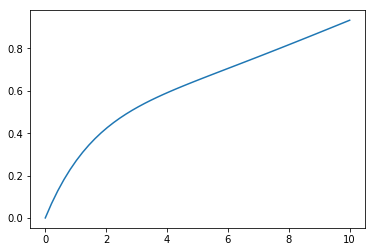

In [22]:
V = 10 # L
k1 = 0.1 # 1/M/s
k2 = 0.5 # 1/M/s

kb1 = 0.2 
kc1 = 0.4
kd1 = 0.5
kc2 = 0.5
kd2 = 0.7

nu_i = 2
nu_m = 3
nu_o = 4

C_in_0 = [1, 0, 0, 0]
C_m_0 = [0.5, 0.5, 0.5]
C_o_0 = [0, 0]

def dFdV(F, V):
    FAi, FBi, FCi, FDi, FBm, FCm, FDm, FCo, FDo = F
    CAi, CBi, CCi, CDi = np.array([FAi, FBi, FCi, FDi]) / nu_i
    CBm, CCm, CDm = F[4:7] / nu_m
    CCo, CDo = F[7:9] / nu_o
    
    r1 = k1 * CAi * CBi
    r2 = k2 * CAi * CCi
    
    RBmi = kb1 * (CBm - CBi)
    RCmi = kc1 * (CCm - CCi)
    RDmi = kd1 * (CDm - CDi)
    RCom = kc2 * (CCo - CCm)
    RDom = kd2 * (CDo - CDm)
    
    y1 = -r1 - r2
    y2 = -r2 + RBmi
    y3 = 4 * r1 - r2 + RCmi
    y4 = 3 * r2 + RDmi
    
    y5 = - RBmi
    y6 = - RCmi + RCom
    y7 = - RDmi + RDom
    
    y8 = - RCom
    y9 = - RDom
    
    y = [y1, y2, y3, y4, y5, y6, y7, y8, y9]
    
    return y

C0 = [2, 0, 0, 0, 1.5, 1.5, 1.5, 0, 0]
Vspan = np.linspace(0, V)

C = odeint(dFdV, C0, Vspan)
plt.plot(Vspan, C[:, 8])
# plt.legend(['CAin', 'CBin', 'CCin', 'CDin', 'CBm', 'CCm', 'CDm', 'CCo', 'CDo'])
plt.show()

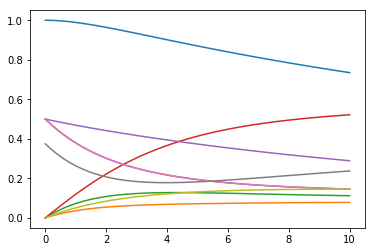

In [23]:
V = 10 # L
k1 = 0.1 # 1/M/s
k2 = 0.5 # 1/M/s

kb1 = 0.2 
kc1 = 0.4
kd1 = 0.5
kc2 = 0.5
kd2 = 0.7

nu_i = 2
nu_m = 3
nu_o = 4

C_in_0 = [1, 0, 0, 0]
C_m_0 = [0.5, 0.5, 0.5]
C_o_0 = [0, 0]

def dFdV(F, V):
    FAi, FBi, FCi, FDi, FBm, FCm, FDm, FCo, FDo = F
    CAi, CBi, CCi, CDi = np.array([FAi, FBi, FCi, FDi]) / nu_i
    CBm, CCm, CDm = F[4:7] / nu_m
    CCo, CDo = F[7:9] / nu_o
    
    r1 = k1 * CAi * CBi
    r2 = k2 * CAi * CCi
    
    RBmi = kb1 * (CBm - CBi)
    RCmi = kc1 * (CCm - CCi)
    RDmi = kd1 * (CDm - CDi)
    RCom = kc2 * (CCo - CCm)
    RDom = kd2 * (CDo - CDm)
    
    y1 = -r1 - r2
    y2 = -r2 + RBmi
    y3 = 4 * r1 - r2 + RCmi
    y4 = 3 * r2 + RDmi
    
    y5 = - RBmi
    y6 = - RCmi + RCom
    y7 = - RDmi + RDom
    
    y8 = - RCom
    y9 = - RDom
    
    y = [y1, y2, y3, y4, y5, y6, y7, y8, y9]
    
    return y

F0 = [2, 0, 0, 0, 1.5, 1.5, 1.5, 0, 0]
Vspan = np.linspace(0, V)

F = odeint(dFdV, F0, Vspan)

CAi = F[:, 0] / nu_i
CBi = F[:, 1] / nu_i
CCi = F[:, 2] / nu_i
CDi = F[:, 3] / nu_i

CBm = F[:, 4] / nu_m
CCm = F[:, 5] / nu_m
CDm = F[:, 5] / nu_m

CCo = F[:, 6] / nu_o
CDo = F[:, 7] / nu_o

plt.plot(Vspan, CAi, Vspan, CBi, Vspan, CCi, Vspan, CDi, Vspan, CBm, Vspan, CCm, Vspan, CDm, Vspan, CCo, Vspan, CDo)

# plt.legend(['CAFn', 'CBin', 'CCin', 'CDin', 'CBm', 'CCm', 'CDm', 'CCo', 'CDo'])
plt.show()

In [8]:
F.shape

(50, 9)

In [ ]:
C[]